# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv("Bank_data.csv")

In [4]:
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [8]:
data = raw_data.copy()
data = data.drop(['Unnamed: 0'], axis=1)
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [20]:
x1 = data['duration']
y = data['y']

0      117.0
1      274.0
2      167.0
3      686.0
4      157.0
       ...  
513    204.0
514    806.0
515    290.0
516    473.0
517    142.0
Name: duration, Length: 518, dtype: float64

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [10]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                  0.2121
Time:                        09:52:21   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

<Axes: xlabel='duration', ylabel='y'>

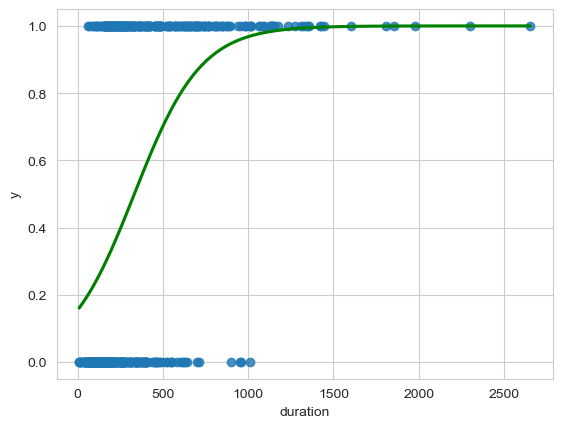

In [16]:
sns.regplot(x=x1, y=y, data=data, logistic=True, ci=None, line_kws=({'color':'green'}))

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [23]:
data_1 = data.drop(['y'], axis=1)
x1 = data_1[data_1.columns]

In [30]:
x = sm.add_constant(x1)
reg_log2 = sm.Logit(y,x)
results_log2 = reg_log2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                  0.5153
Time:                        10:04:42   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [26]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [32]:
cm = confusion_matrix(x, y, results_log2)

In [33]:
cm

(array([[220.,  39.],
        [ 31., 228.]]),
 0.8648648648648649)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [34]:
raw_test_data = pd.read_csv("Bank_data_testing.csv")

In [37]:
test_data = raw_test_data.drop(['Unnamed: 0'], axis=1)
test_data['y'] = test_data['y'].map({'yes': 1, 'no': 0})
test_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [40]:
data_2 = test_data.drop(['y'], axis=1)
x1 = data_2[data_2.columns]
y = test_data['y']

In [49]:
x_test = sm.add_constant(x1)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [50]:
cm = confusion_matrix(x_test, y, results_log2)

In [51]:
cm

(array([[94., 17.],
        [12., 99.]]),
 0.8693693693693694)

In [55]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Prediction 0', 'Preidction 1']
cm_df = cm_df.rename(index={0: 'index 0', 1: 'index 1'})
cm_df

,Prediction 0,Preidction 1
index 0,94.0,17.0
index 1,12.0,99.0
